In [1]:
from pylab import *
import networkx as nx

In [2]:
g = nx.read_edgelist('scsc.net', delimiter = ' ')

In [3]:
g.number_of_nodes()

262

In [4]:
g.number_of_edges()

596

In [5]:
g.is_directed()

False

In [7]:
nx.density(g)

0.017431487818431752

In [10]:
%matplotlib auto
nx.draw(g, node_size = 0.001)

Using matplotlib backend: Qt5Agg


In [11]:
ccs = list(nx.connected_components(g))

In [13]:
len(ccs)

9

In [14]:
[len(cc) for cc in ccs]

[239, 7, 3, 2, 2, 2, 3, 2, 2]

In [16]:
lcc = list(nx.connected_component_subgraphs(g))[0]

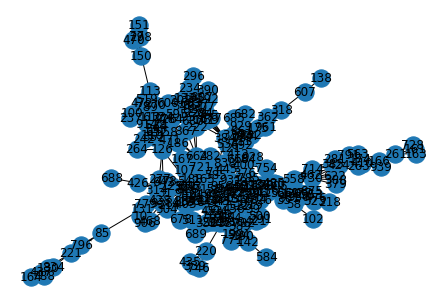

In [19]:
%matplotlib inline
nx.draw(lcc, with_labels = True)

In [20]:
nx.shortest_path(g, '151', '138')

['151', '77', '150', '113', '334', '229', '384', '832', '318', '607', '138']

In [21]:
nx.shortest_path_length(g, '151', '138')

10

In [23]:
nx.average_shortest_path_length(lcc)

4.577546499771457

In [26]:
D = nx.floyd_warshall_numpy(lcc)

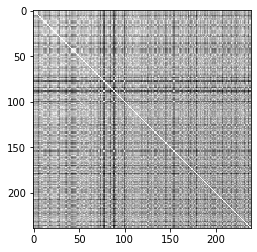

In [28]:
imshow(D, cmap = 'binary')

In [30]:
nx.eccentricity(lcc, '151')

13

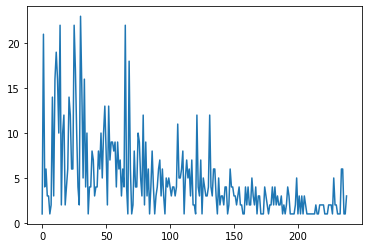

In [39]:
degs = list(dict(lcc.degree()).values())
plot(degs)

(array([121.,  51.,  25.,  13.,   8.,   9.,   4.,   2.,   1.,   5.]),
 array([ 1. ,  3.2,  5.4,  7.6,  9.8, 12. , 14.2, 16.4, 18.6, 20.8, 23. ]),
 <a list of 10 Patch objects>)

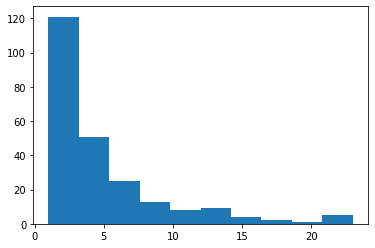

In [40]:
hist(degs)

In [41]:
h = nx.degree_histogram(g)

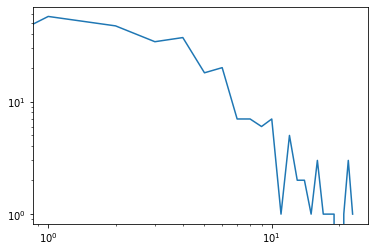

In [44]:
loglog(range(len(h)), h)

In [47]:
%matplotlib auto
nx.draw(g, node_size = 0)

Using matplotlib backend: Qt5Agg


In [20]:
from pylab import *
import networkx as nx

def initialize():
    global g, positions
    g = nx.complete_graph(5)
    positions = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['domain'] = choice([1, 2, 3, 4, 5])
    
def observe():
    global g, positions
    cla()
    nx.draw(g, pos = positions, 
            node_color = [g.nodes[i]['domain'] for i in g.nodes])
    
def update():
    global g, positions
    i = g.number_of_nodes() # name of the newcomer
    g.add_node(i)
    g.nodes[i]['domain'] = choice([1, 2, 3, 4, 5])
    positions[i] = (random(), random())
    m = randint(1, 3)
    for k in range(m):
        candidates = []
        for j in g.nodes:
            if j != i and j not in g.neighbors(i):
                if g.nodes[j]['domain'] == g.nodes[i]['domain']:
                    candidates.append(j)
                elif random() < 0.2:
                    candidates.append(j)
        if len(candidates) > 0:
            if random() < 0.5:
                j = max(candidates, key = lambda x:g.degree(x))
            else:
                j = choice(candidates)
            g.add_edge(i, j)
    positions = nx.spring_layout(g, pos = positions, iterations = 2)

In [21]:
import pycxsimulator
pycxsimulator.GUI().start(func=[initialize, observe, update])

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Hiroki\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "C:\Users\Hiroki\Anaconda3\lib\tkinter\__init__.py", line 749, in callit
    func(*args)
  File "C:\Users\Hiroki\OneDrive\pycxsimulator.py", line 232, in stepModel
    self.status.configure(foreground='black')
  File "C:\Users\Hiroki\Anaconda3\lib\tkinter\__init__.py", line 1485, in configure
    return self._configure('configure', cnf, kw)
  File "C:\Users\Hiroki\Anaconda3\lib\tkinter\__init__.py", line 1476, in _configure
    self.tk.call(_flatten((self._w, cmd)) + self._options(cnf))
_tkinter.TclError: invalid command name ".!label"
